# MACHINE LEARNING
## FINAL PROJECT
### CLASSIFY AUDIO TRACKS INTO SONG GENRES

- BALLESTEROS PEREZ Maxime
- BERNABEU Anthony
- CLARENC Tiago
- LAGARDE Leo
- QUSHKU Brunilda

### INTRODUCTION

Our company asked us to work on a machine learning model that will help them  classify music tracks into their respective genre.

Our smart and beautiful team, composed of five data scientists,  is going to do so by building a machine learning model that will classify given tracks into their target genre.

Before starting our journey with the dataset we need to import all the tools that will help us assess, clean, do feature engineering and implement our ML models later :


## I - IMPORT & DATA EXTRACTION

In [1]:
# IMPORT THE SRC USEFUL FUNCTIONS FROM THE TEACHER
import os
import sys

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import useful functios to count categories and identify missing data
from src.helpers import identify_number_categories, identify_missing_data
#from src.outliers import calc_outliers

# Import to plot feature importances for each model
from src.feature_importance_plot import feature_importance_plot

# Import to plot learning curves to modelize our results on training vs. testing set
from src.learning_curve_plot import learning_curve_plot


In [2]:
# LIBRARIES & IMPORTS

######### BASIC IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

######### MACHINE LEARNING IMPORTS

# MODEL SELECTION
from sklearn.model_selection import train_test_split

# LABEL ENCODER PACKAGE
from sklearn import preprocessing

# STANDARD SCALER
from sklearn.preprocessing import StandardScaler

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeClassifier

# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestClassifier

# XGBOOST
from xgboost import XGBClassifier

# METRICS IMPORTS
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

# COUNTER IMPORT
from collections import Counter

# MODEL SELECTION IMPORTS
from sklearn.model_selection import learning_curve, cross_val_score

# IMPORT OF GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV




Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [3]:
# Read the data from the csv file

df_tracks = pd.read_csv('../data/songs_data.csv')

In [4]:
# An overview of the structure of our dataset (first 3 rows)

df_tracks.head(n = 3)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   

   track_artist  track_popularity playlist_name             playlist_id genre  \
0    Ed Sheeran                66     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   pop   
1      Maroon 5                67     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   pop   
2  Zara Larsson                70     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616

Our company provided us with the dataset from their archives. We determined it was usable thanks to two criterias:


- Sufficient number of columns (x19) 
- Sufficient number of rows (x32833) 

In [5]:
# Shape of the data

df_tracks.shape

(32833, 19)

In [6]:
# Number of rows :
print('- Number of rows in our dataset : ', df_tracks.shape[0])

# Number of columns :
print('- Number of columns in our dataset : ', df_tracks.shape[1])


- Number of rows in our dataset :  32833
- Number of columns in our dataset :  19


In [7]:
# Summary statistics for each numerical column

df_tracks.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000




Thanks to the code :


In [8]:
# Info on all datatypes of each column

df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

We understand that there are 10 numerical columns and 9 non- numerical columns.
Our future step will be to encode the non - numerical columns that we think are important for our model.


## II - EXPLORATORY DATA ANALYSIS (EDA)

To start, we decided to identify the columns that are numericals, the one that are categoricals and the one that are booleans, thanks to this two codes:


In [9]:
# Numerical Values
numerical_columns = list(df_tracks.select_dtypes(['int64']) + df_tracks.select_dtypes(['float64']))

#numerical_columns
print('- The numerical columns are : ', numerical_columns)


- The numerical columns are :  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'track_popularity', 'valence']


In [10]:
# Categorical Values
categorical_columns = list(df_tracks.select_dtypes(['object']))

#categorical_columns
print('- The categorical columns are : ', categorical_columns)


- The categorical columns are :  ['track_id', 'track_name', 'track_artist', 'playlist_name', 'playlist_id', 'genre']


In [11]:
# Boolean Values
boolean_columns = list(df_tracks.select_dtypes(['bool']))

#boolean_columns
print('- The boolean columns are : ', boolean_columns)


- The boolean columns are :  []


The fact that comes in our eyes is that there are no booleans .

After that we decided to analyze the Standard Deviation which is a number that describes how spread out the values are.

A low standard deviation means that most of the numbers are close to the mean (average) value.

A high standard deviation means that the values are spread out over a wider range.


In [12]:
# Check the Standard Deviation for each column

std_dev = df_tracks.std()

print("Standard Deviation of each column :  ", std_dev)


Standard Deviation of each column :   track_popularity       24.984074
danceability            0.145085
energy                  0.180910
key                     3.611657
loudness                2.988436
mode                    0.495671
speechiness             0.101314
acousticness            0.219633
instrumentalness        0.224230
liveness                0.154317
valence                 0.233146
tempo                  26.903624
duration_ms         59834.006182
dtype: float64


In [13]:
# Correlation matrix of our dataset
c_matrix = df_tracks.corr()

c_matrix

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064748 -0.109112 -0.000650   
danceability              0.064748      1.000000 -0.086073  0.011736   
energy                   -0.109112     -0.086073  1.000000  0.010052   
key                      -0.000650      0.011736  0.010052  1.000000   
loudness                  0.057687      0.025335  0.676625  0.000959   
mode                      0.010637     -0.058647 -0.004800 -0.174093   
speechiness               0.006819      0.181721 -0.032150  0.022607   
acousticness              0.085159     -0.024519 -0.539745  0.004306   
instrumentalness         -0.149872     -0.008655  0.033247  0.005968   
liveness                 -0.054584     -0.123859  0.161223  0.002887   
valence                   0.033231      0.330523  0.151103  0.019914   
tempo                    -0.005378     -0.184084  0.149951 -0.013370   
duration_ms              -0.143682     -0.096879  0.012611  0.015139   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.057687  0.010637     0.006819      0.085159   
danceability      0.025335 -0.058647     0.181721     -0.024519   
energy            0.676625 -0.004800    -0.032150     -0.539745   
key               0.000959 -0.174093     0.022607      0.004306   
loudness          1.000000 -0.019289     0.010339     -0.361638   
mode             -0.019289  1.000000    -0.063512      0.009415   
speechiness       0.010339 -0.063512     1.000000      0.026092   
acousticness     -0.361638  0.009415     0.026092      1.000000   
instrumentalness -0.147824 -0.006741    -0.103424     -0.006850   
liveness          0.077613 -0.005549     0.055426     -0.077243   
valence           0.053384  0.002614     0.064659     -0.016845   
tempo             0.093767  0.014329     0.044603     -0.112724   
duration_ms      -0.115058  0.015634    -0.089431     -0.081581   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.149872 -0.054584  0.033231 -0.005378    -0.143682  
danceability             -0.008655 -0.123859  0.330523 -0.184084    -0.096879  
energy                    0.033247  0.161223  0.151103  0.149951     0.012611  
key                       0.005968  0.002887  0.019914 -0.013370     0.015139  
loudness                 -0.147824  0.077613  0.053384  0.093767    -0.115058  
mode                     -0.006741 -0.005549  0.002614  0.014329     0.015634  
speechiness              -0.103424  0.055426  0.064659  0.044603    -0.089431  
acousticness             -0.006850 -0.077243 -0.016845 -0.112724    -0.081581  
instrumentalness          1.000000 -0.005507 -0.175402  0.023335     0.063235  
liveness                 -0.005507  1.000000 -0.020560  0.021018     0.006138  
valence                  -0.175402 -0.020560  1.000000 -0.025732    -0.032225  
tempo                     0.023335  0.021018 -0.025732  1.000000    -0.001412  
duration_ms               0.063235  0.006138 -0.032225 -0.001412     1.000000

An important step of EDA is to create a correlation matrix to look at the correlations between the data. To better understand and visualize the correlation between variables we plot using a heatmap :


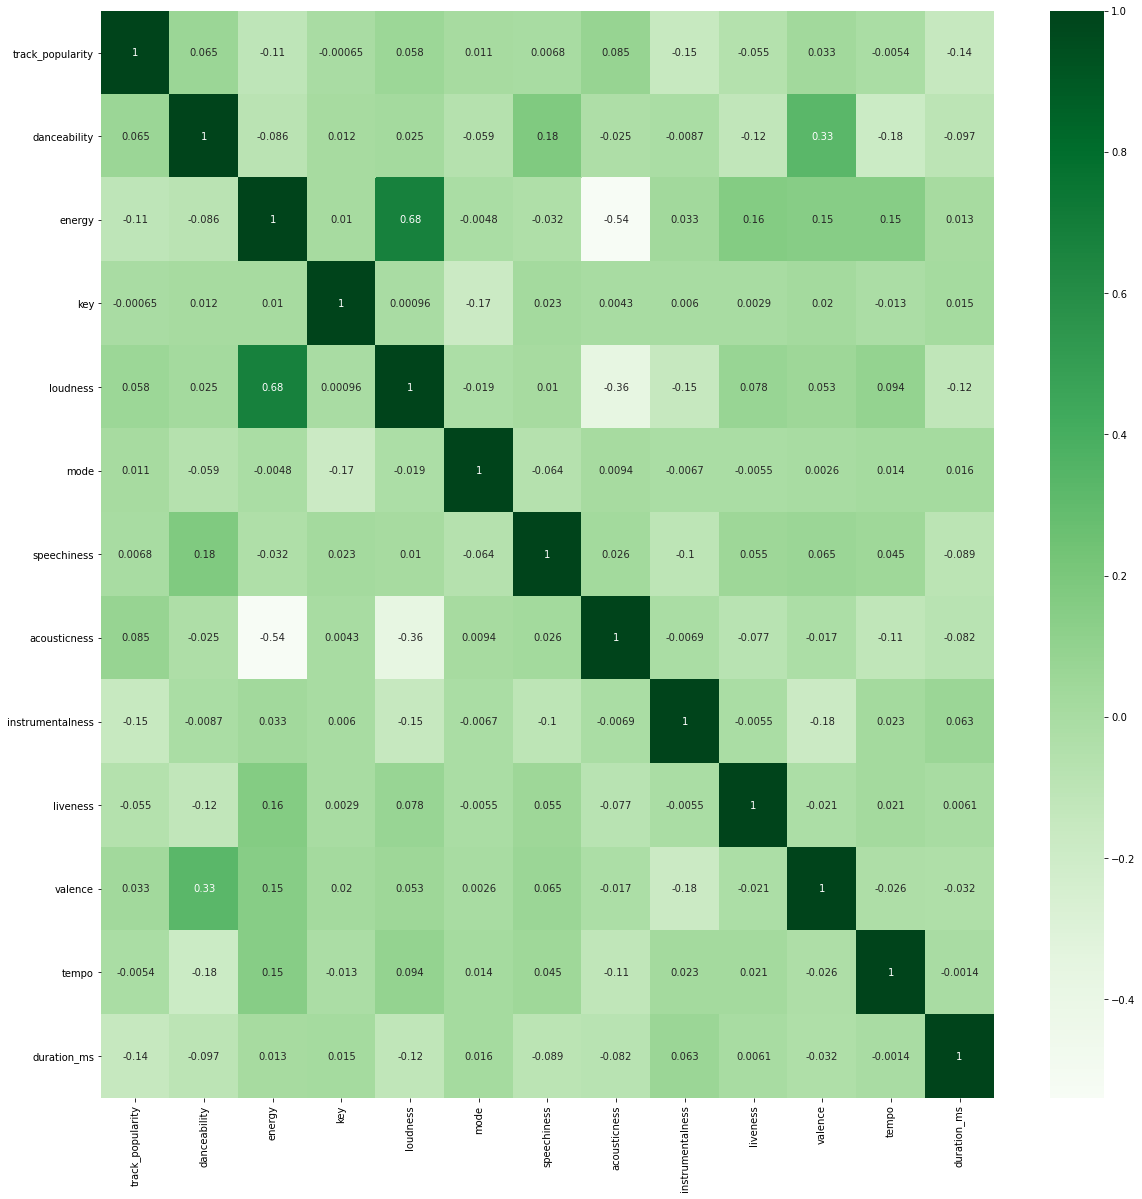

In [14]:
# Plot the correlation matrix thanks to seaborn

plt.figure(figsize = (20, 20))

sns.heatmap(c_matrix, cmap = "Greens", annot = True)

plt.show()


We can see a high correlation rate of 0.68 between loudness and energy or a potential correlation between valence & danceability (0.33). 


We therefore tried to explore some of the features of the dataset and  visualize what was the most popular artists or what was the most popular genres for example: 


In [15]:
# PLOT of the most popular artists of the dataset

artistbypop = df_tracks.groupby('track_artist').sum().sort_values('track_popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

#plot the graph
px.bar(x='track_artist', y='track_popularity', data_frame=artistbypop)


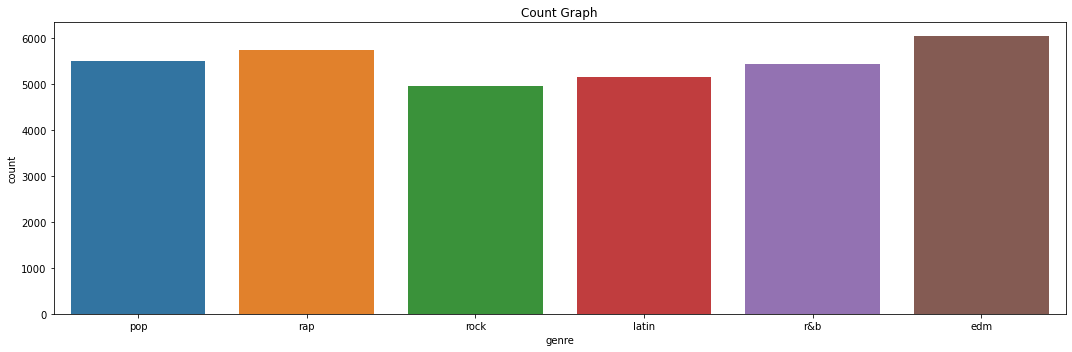

In [16]:
# PLOT the distribution for the target column : genre

figure = plt.figure(figsize=(15,5))

sns.countplot(x='genre',data = df_tracks).set_title('Count Graph')

figure.tight_layout()
    

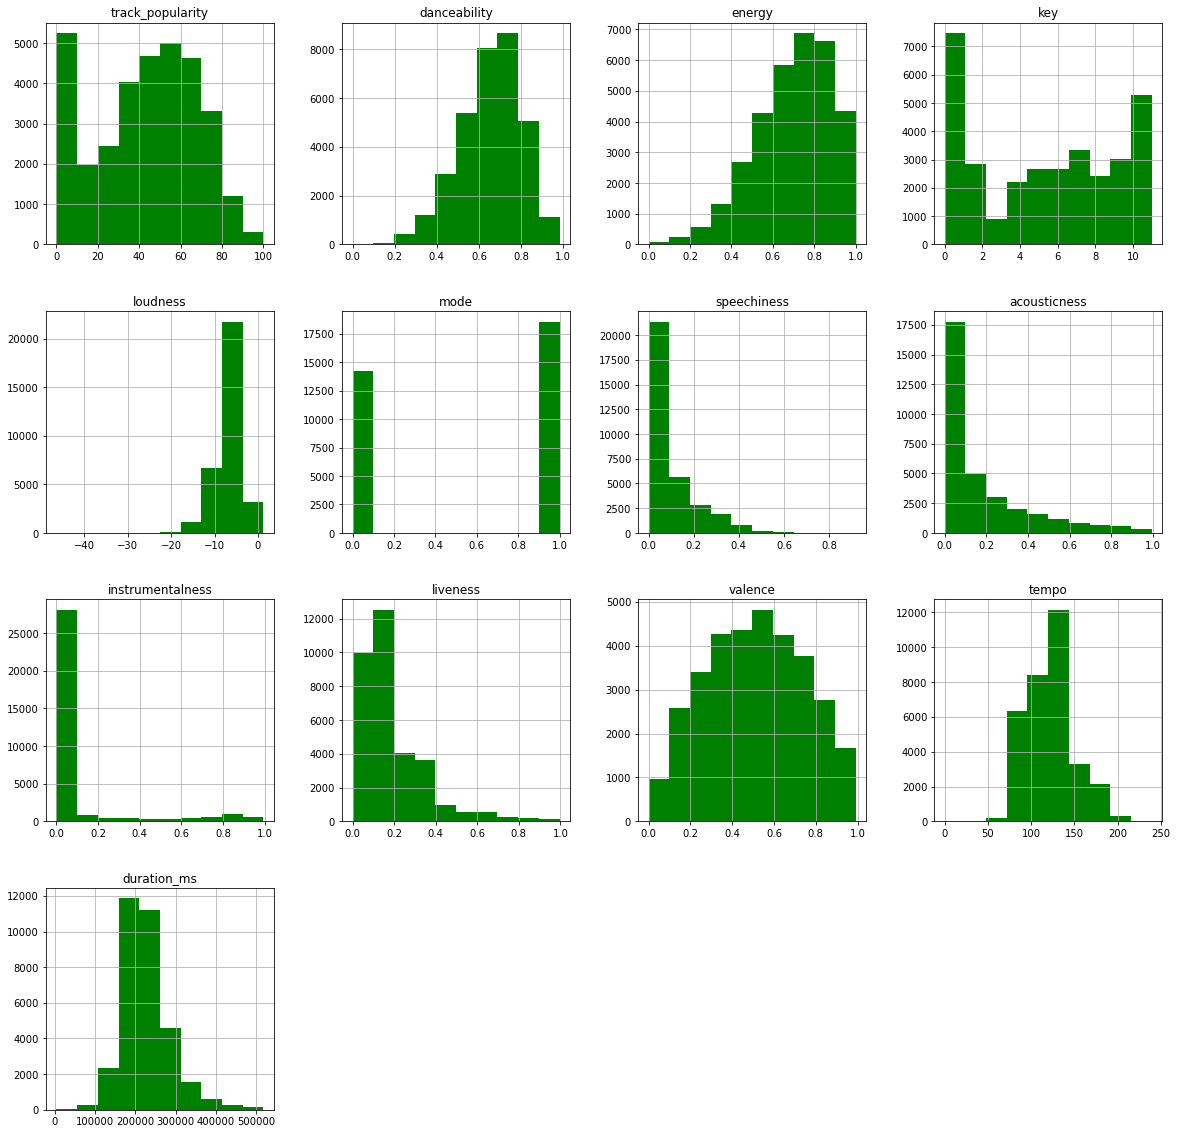

In [17]:
# Distribution of all numerical data

df_tracks.hist(color = "Green", figsize = (20,20))

plt.show()


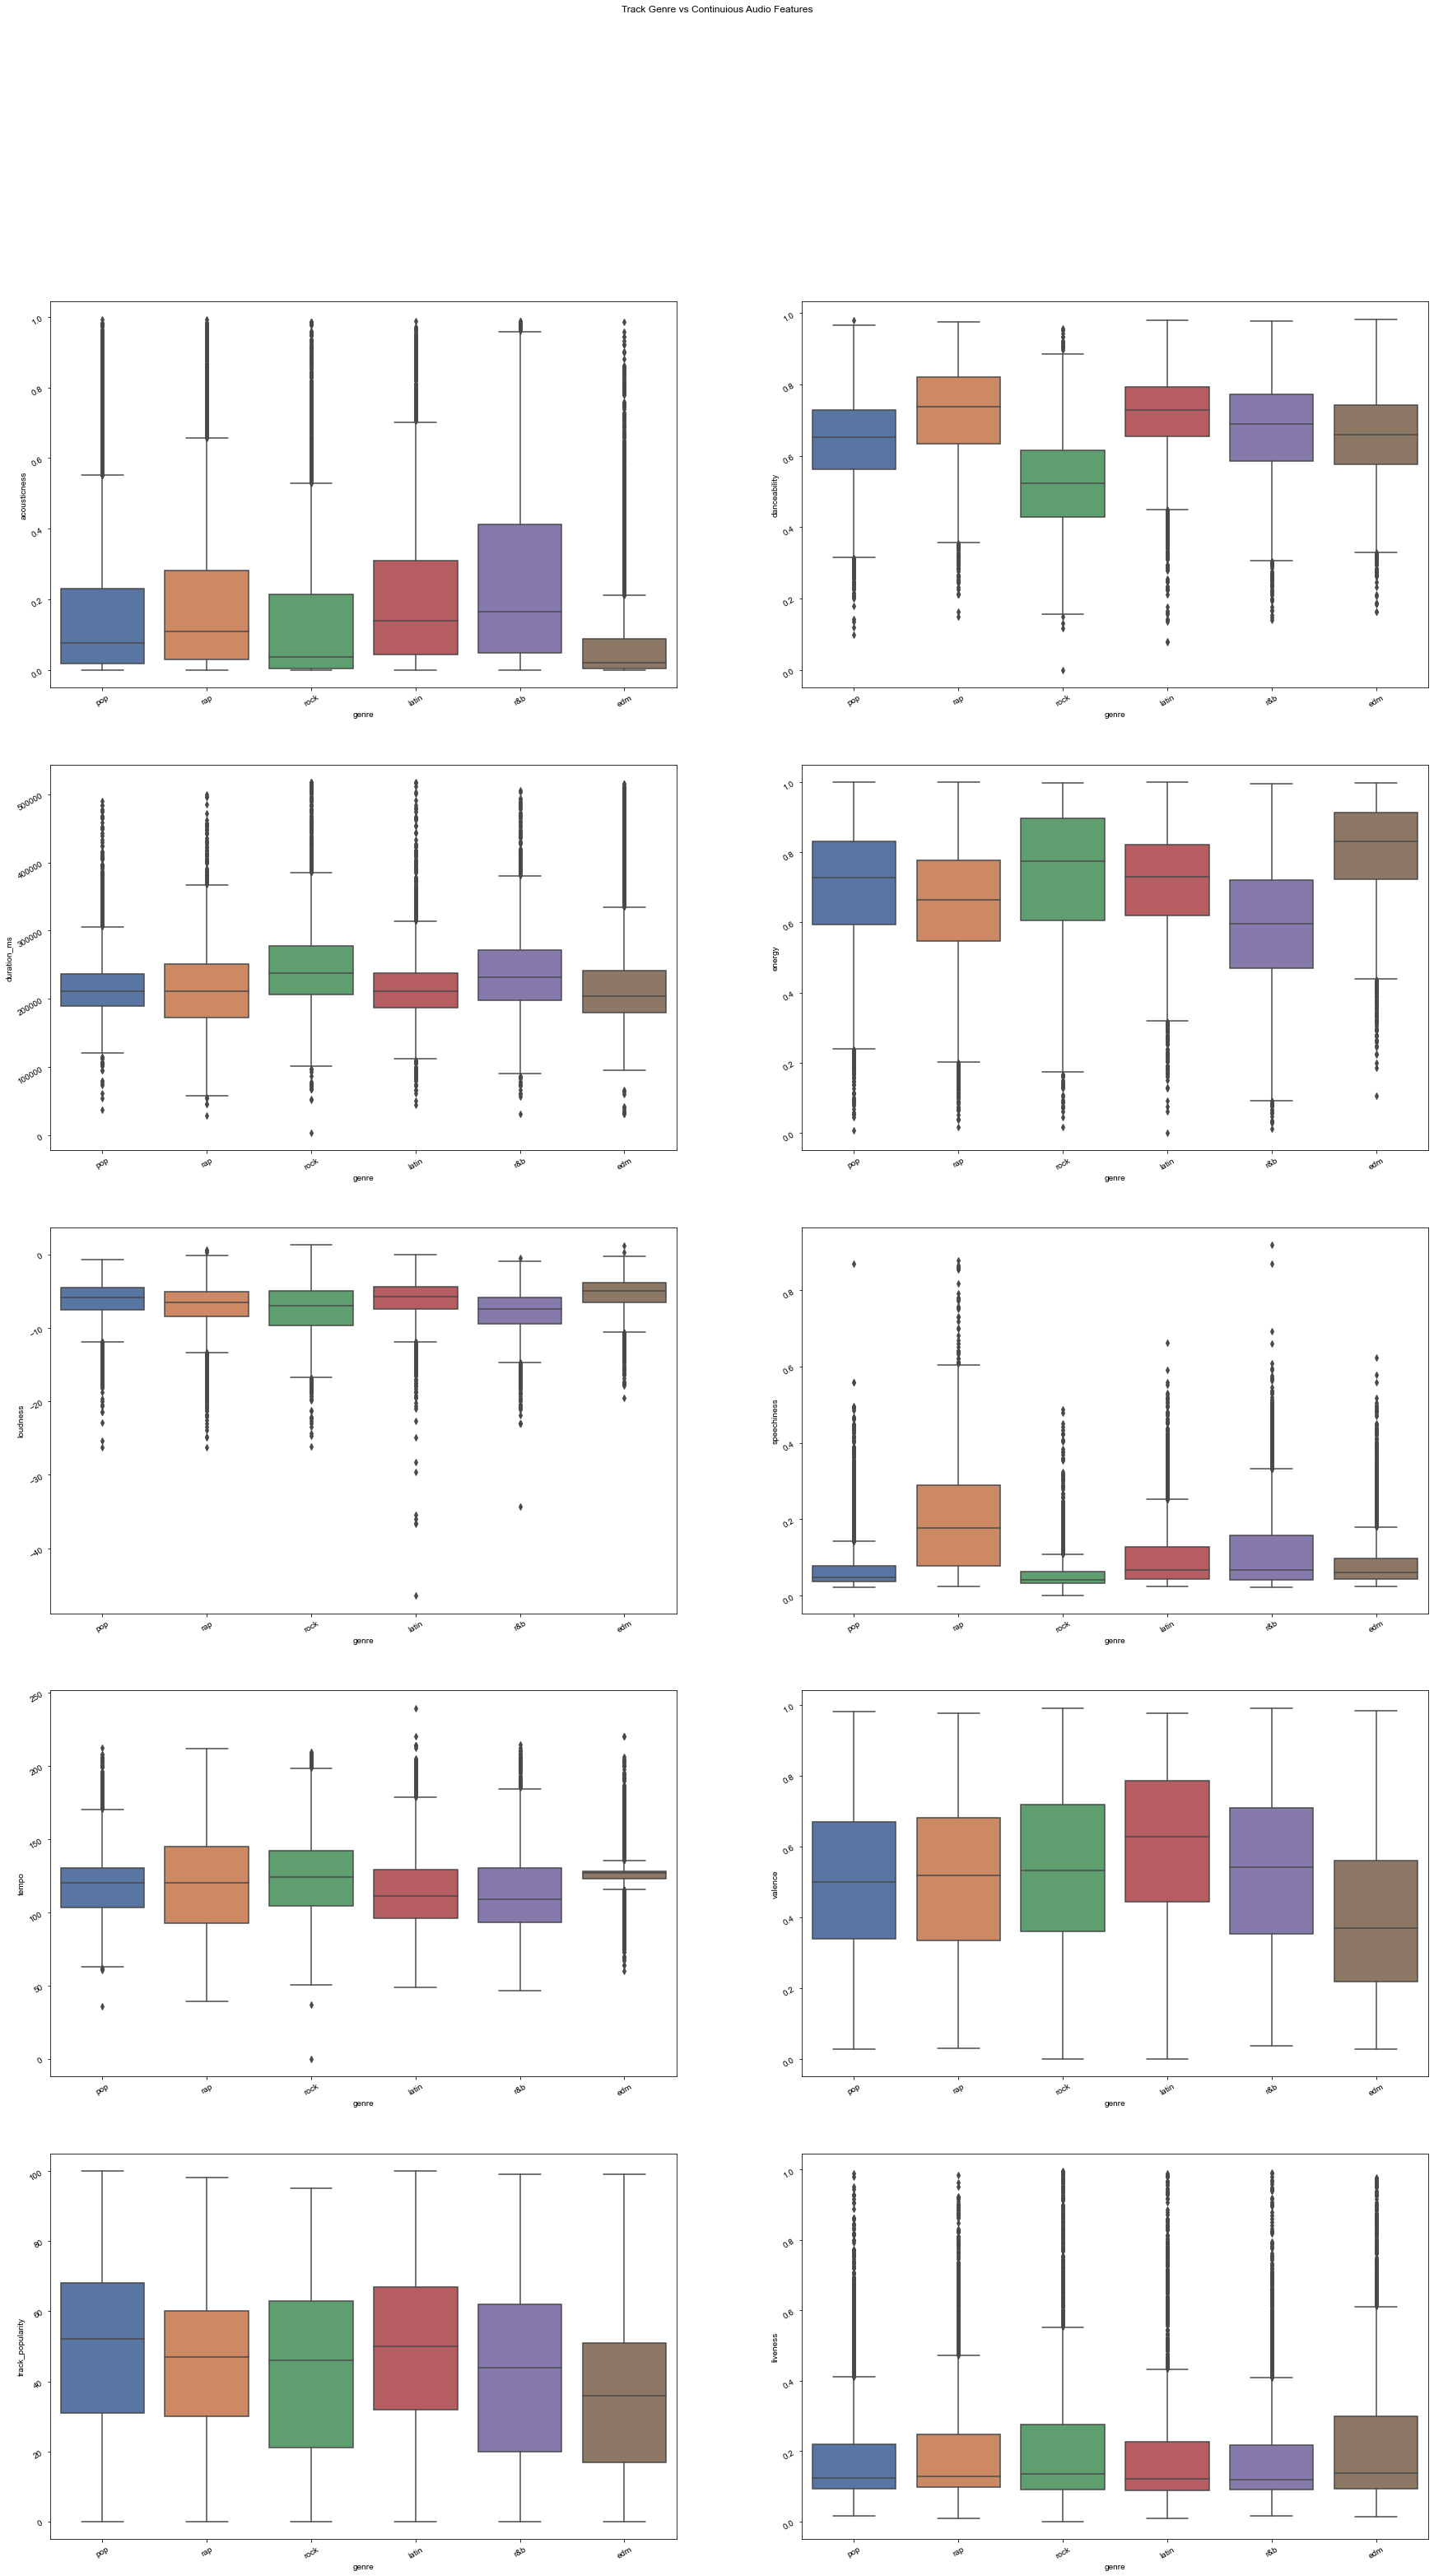

In [18]:
#How the Audio Features differ among the differnt root genres
fig, axes = plt.subplots(5,2,figsize=(30, 50))
fig.suptitle("Track Genre vs Continuious Audio Features")

sns.set(font_scale = 1.25)
#acousticness
plt1 = sns.boxplot(ax = axes[0,0],data = df_tracks, x = "genre", y = 'acousticness')

#danceability
plt2 = sns.boxplot(ax = axes[0,1],data = df_tracks, x = "genre", y = 'danceability')

#duration_ms
plt3 = sns.boxplot(ax = axes[1,0],data = df_tracks, x = "genre", y = 'duration_ms')

#energy
plt4 = sns.boxplot(ax = axes[1,1],data = df_tracks, x = "genre", y = 'energy')

#loudness
plt5 = sns.boxplot(ax = axes[2,0],data = df_tracks, x = "genre", y = 'loudness')

#speechiness
plt6 = sns.boxplot(ax = axes[2,1],data = df_tracks, x = "genre", y = 'speechiness')

#tempo
plt7 = sns.boxplot(ax = axes[3,0],data = df_tracks, x = "genre", y = 'tempo')

#valence
plt8 = sns.boxplot(ax = axes[3,1],data = df_tracks, x = "genre", y = 'valence')

#popularity
plt9 = sns.boxplot(ax = axes[4,0],data = df_tracks, x = "genre", y = 'track_popularity')

#liveness
plt10 = sns.boxplot(ax = axes[4,1],data = df_tracks, x = "genre", y = 'liveness')

for ax in fig.axes:
    ax.tick_params(labelrotation=30)

We have two highly-correlated pairs of features : Energy / Loudness & Valence / Danceability.


To explore those potential relationship other tools were used in this part for visualization like scatter plot or boxplot :


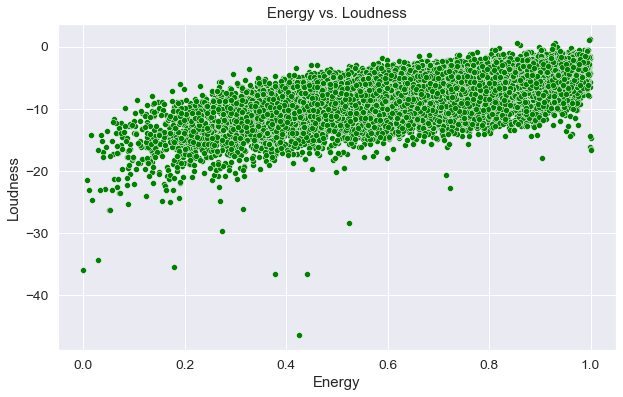

In [19]:
# PLOT : Energy vs. Loudness

plt.figure(figsize = (10,6))
ax = sns.scatterplot(data = df_tracks, x = "energy", y = "loudness", color = "green")
ax.set_title("Energy vs. Loudness")
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness");

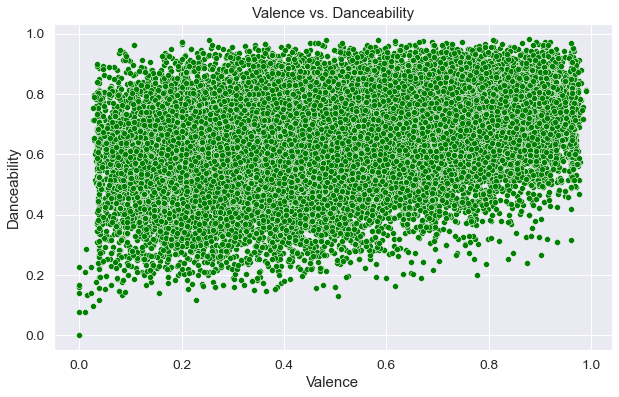

In [20]:
# PLOT : Valence vs. Danceability

plt.figure(figsize = (10,6))
ax = sns.scatterplot(data = df_tracks, x = "valence", y = "danceability", color = "green")
ax.set_title("Valence vs. Danceability")
ax.set_xlabel("Valence")
ax.set_ylabel("Danceability");


The scatter plot shows indeed a relationship between Energy Vs Loudness which makes sense because Energy represents how high sound variations are on a specific song and loudness represents the volume level of the song.


/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='loudness', ylabel='Density'>

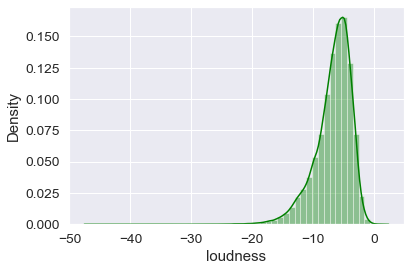

In [21]:
# Distplot of loudness

sns.distplot(df_tracks.loudness, color = "green")


/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='energy', ylabel='Density'>

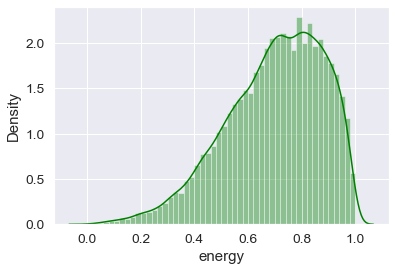

In [22]:
# Distplot of energy

sns.distplot(df_tracks.energy, color = "green")

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



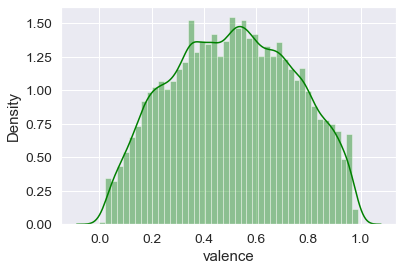

In [23]:
# Distplot of Valence

sns.distplot(df_tracks.valence, color = "green");

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



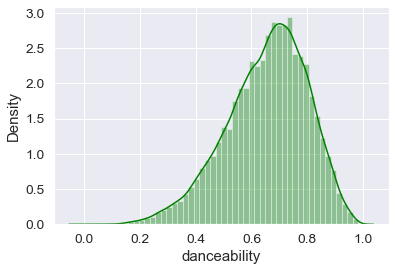

In [24]:
# Distplot of Danceability

sns.distplot(df_tracks.danceability, color = "green");

#### FOCUS ON SOME WELL-CORRELATED COLUMNS

In [25]:
# Focus on loudness

df_tracks.loudness.describe()


count    32833.000000
mean        -6.719499
std          2.988436
min        -46.448000
25%         -8.171000
50%         -6.166000
75%         -4.645000
max          1.275000
Name: loudness, dtype: float64

In [26]:
# Most frequent value of loudness

df_tracks.loudness.mode()

0   -6.400
1   -5.608
2   -4.973
3   -4.443
4   -3.782
dtype: float64

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

invalid value encountered in log



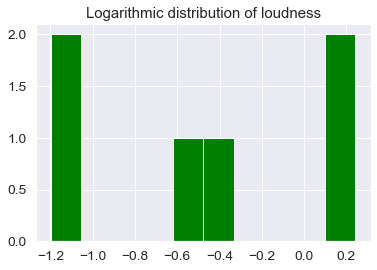

In [27]:
# Applying logarithmic transformation on loudness

np.log(df_tracks.loudness).hist(color = "green")

plt.title("Logarithmic distribution of loudness");


In [28]:
# Focus on energy

df_tracks.energy.describe()


count    32833.000000
mean         0.698619
std          0.180910
min          0.000175
25%          0.581000
50%          0.721000
75%          0.840000
max          1.000000
Name: energy, dtype: float64

In [29]:
# Most frequent value of energy

df_tracks.energy.mode()

0    0.787
dtype: float64

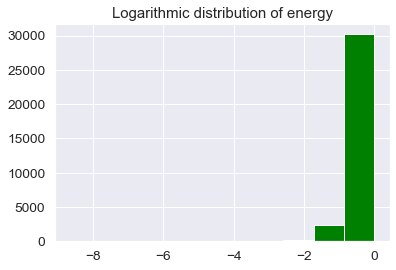

In [30]:
# Applying logarithmic transformation on energy

np.log(df_tracks.energy).hist(color = "green")

plt.title("Logarithmic distribution of energy");


In [31]:
# Focus on valence

df_tracks.valence.describe()


count    32833.000000
mean         0.510561
std          0.233146
min          0.000000
25%          0.331000
50%          0.512000
75%          0.693000
max          0.991000
Name: valence, dtype: float64

In [32]:
# Most frequent value of valence

df_tracks.valence.mode()

0    0.961
dtype: float64

In [33]:
# Focus on danceability

df_tracks.danceability.describe()


count    32833.000000
mean         0.654850
std          0.145085
min          0.000000
25%          0.563000
50%          0.672000
75%          0.761000
max          0.983000
Name: danceability, dtype: float64

In [34]:
# Most frequent value of danceability

df_tracks.danceability.mode()

0    0.733
dtype: float64

## III - DATA CLEANING

To initiate the data cleaning, we started to identify all missing values in the data set :


In [35]:
# Determine all NULL values in our dataset

df_tracks.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

We noticed 5 rows in the track_name & track_artist columns filled with NaN values. 
No need to keep empty rows in the dataset so we created a new data set called df_tracks_cleaned without those 5 rows.


In [36]:
df_tracks[df_tracks["track_artist"].isnull()]

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

            playlist_name             playlist_id  genre  danceability  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV    rap         0.714   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g    rap         0.678   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g    rap         0.465   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f  latin         0.675   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q  latin         0.714   

       energy  key  loudness  mode  speechiness  acousticness  \
8151    0.821    6    -7.635     1       0.1760        0.0410   
9282    0.659   11    -5.364     0       0.3190        0.0534   
9283    0.820   10    -5.907     0       0.3070        0.0963   
19568   0.919   11    -6.075     0       0.0366        0.0606   
19811   0.821    6    -7.635     1       0.1760        0.0410   

       instrumentalness  liveness  valence    tempo  duration_ms  
8151            0.00000    0.1160    0.649   95.999       282707  
9282            0.00000    0.5530    0.191  146.153       202235  
9283            0.00000    0.0888    0.505   86.839       206465  
19568           0.00653    0.1030    0.726   97.017       252773  
19811           0.00000    0.1160    0.649   95.999       282707

In [37]:
df_tracks_cleaned = df_tracks[~df_tracks["track_artist"].isnull()]

We check if the correct number of rows has been removed, depending only on these missing values.

In [38]:
# We check if all our null values have been droped well

df_tracks.shape[0] - df_tracks_cleaned.shape[0]

5

To pursue our data cleaning process, it was necessary to check the categorical values for each categorical columns : 

In [39]:
# Check the categorical values for each categorical column

categorical_values = []

for c in categorical_columns:
    
    categorical_values.append({"categorical_feature_name" : c, "count" : len(df_tracks_cleaned[c].unique())})

pd.DataFrame(categorical_values)


categorical_feature_name  count
0                 track_id  28352
1               track_name  23449
2             track_artist  10692
3            playlist_name    449
4              playlist_id    471
5                    genre      6

At this point, we decided to remove all the "big" categorical features with a lot of different values : track_id, track_name.

We also wanted to remove the 2 features related to playlists : playlist_name & playlist_id, since they seem to confuse us about genres of each music.

We decided to keep our last categorical feature : track_artist, and extend our analysis on how to exploit it to feed our future machine learning models.

Here is a first observation on this column :

In [40]:
df_tracks_cleaned["track_artist"].value_counts().nlargest(50)

Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Guns N' Roses                 79
The Weeknd                    76
Avicii                        74
J Balvin                      72
Maroon 5                      71
Ed Sheeran                    69
Major Lazer                   67
Logic                         66
Daddy Yankee                  66
Tiësto                        66
2Pac                          65
DJ Snake                      62
Wisin & Yandel                61
Bad Bunny                     61
Post Malone                   59
Khalid                        57
50 Cent                       57
Rihanna                       57
Ozuna                         56
Ariana Grande                 55
R3HAB     

Let’s not forget the goal of our project here : Predict the genre of any music in the Dataset. 

In order to accomplish this we need to define a “Target”. In our case, Target is created based on the genre of the dataset df_tracks_cleaned.genre.

In [41]:
# backup of our dataset for the last part
df_backup = df_tracks_cleaned

#### TARGET DEFINITION

In [42]:
# Creating a target value, containing the target used in our future models

target = df_tracks_cleaned.genre
target


0        pop
1        pop
2        pop
3        pop
4        pop
        ... 
32828    edm
32829    edm
32830    edm
32831    edm
32832    edm
Name: genre, Length: 32828, dtype: object

In [43]:
target.describe()

count     32828
unique        6
top         edm
freq       6043
Name: genre, dtype: object

In [44]:
target.value_counts(normalize = True)

edm      0.184081
rap      0.174942
pop      0.167753
r&b      0.165438
latin    0.156970
rock     0.150816
Name: genre, dtype: float64

#### FEATURES SELECTION

As stated during the previous Exploratory Data Analysis step, the Loudness and Energy features are highly correlated, and since loudness does not distinguish between genres as much as energy, the Loudness feature will be dropped for modeling.

We drop all categorical features (except track_artist) and loudness.

In [45]:
# Feature definition

features = df_tracks_cleaned.drop(['genre', 'track_id', 'track_artist', 'track_name', 'playlist_id', 'playlist_name', 'loudness'], axis = 1)

features


track_popularity  danceability  energy  key  mode  speechiness  \
0                    66         0.748   0.916    6     1       0.0583   
1                    67         0.726   0.815   11     1       0.0373   
2                    70         0.675   0.931    1     0       0.0742   
3                    60         0.718   0.930    7     1       0.1020   
4                    69         0.650   0.833    1     1       0.0359   
...                 ...           ...     ...  ...   ...          ...   
32828                42         0.428   0.922    2     1       0.0936   
32829                20         0.522   0.786    0     1       0.0420   
32830                14         0.529   0.821    6     0       0.0481   
32831                15         0.626   0.888    2     1       0.1090   
32832                27         0.603   0.884    5     0       0.0385   

       acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0          0.102000          0.000000    0.0653   0.5180  122.036       194754  
1          0.072400          0.004210    0.3570   0.6930   99.972       162600  
2          0.079400          0.000023    0.1100   0.6130  124.008       176616  
3          0.028700          0.000009    0.2040   0.2770  121.956       169093  
4          0.080300          0.000000    0.0833   0.7250  123.976       189052  
...             ...               ...       ...      ...      ...          ...  
32828      0.076600          0.000000    0.0668   0.2100  128.170       204375  
32829      0.001710          0.004270    0.3750   0.4000  128.041       353120  
32830      0.108000          0.000001    0.1500   0.4360  127.989       210112  
32831      0.007920          0.127000    0.3430   0.3080  128.008       367432  
32832      0.000133          0.341000    0.7420   0.0894  127.984       337500  

[32828 rows x 12 columns]

In [46]:
target_val = target.values
target_val

array(['pop', 'pop', 'pop', ..., 'edm', 'edm', 'edm'], dtype=object)

In [47]:
features_val = features.values
features_val

array([[6.60000e+01, 7.48000e-01, 9.16000e-01, ..., 5.18000e-01,
        1.22036e+02, 1.94754e+05],
       [6.70000e+01, 7.26000e-01, 8.15000e-01, ..., 6.93000e-01,
        9.99720e+01, 1.62600e+05],
       [7.00000e+01, 6.75000e-01, 9.31000e-01, ..., 6.13000e-01,
        1.24008e+02, 1.76616e+05],
       ...,
       [1.40000e+01, 5.29000e-01, 8.21000e-01, ..., 4.36000e-01,
        1.27989e+02, 2.10112e+05],
       [1.50000e+01, 6.26000e-01, 8.88000e-01, ..., 3.08000e-01,
        1.28008e+02, 3.67432e+05],
       [2.70000e+01, 6.03000e-01, 8.84000e-01, ..., 8.94000e-02,
        1.27984e+02, 3.37500e+05]])

## IV - FEATURE ENGINEERING

In this part, the next step is to encode our last categorical variables that we think are relevant to keep to feed our future prediction models.

Let's begin with encoding our target values :

We decided to focus on the genre column.
 
Let's begin with encoding our target (genre) values using sklearn preprocessing.LabelEncoder() that encodes target labels with values between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.

In [48]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_tracks_cleaned['genre'] = label_encoder.fit_transform(df_tracks_cleaned['genre'])
  
label_nb = df_tracks_cleaned['genre'].unique()
label_nb

<ipython-input-48-564ad03306c7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([2, 4, 5, 1, 3, 0])

In [49]:
label_names = label_encoder.inverse_transform([2, 4, 5, 1, 3, 0])
label_names

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [50]:
print("Labels of each class : ")

for i in range(0, len(label_names)):
    
    print("- ", label_names[i], " : ", label_nb[i])
    
    

Labels of each class : 
-  pop  :  2
-  rap  :  4
-  rock  :  5
-  latin  :  1
-  r&b  :  3
-  edm  :  0


Applying a value_counts we were able to gather rows (tracks) by genre regarding the new indexing :


In [51]:
df_tracks_cleaned['genre'].value_counts()

0    6043
4    5743
2    5507
3    5431
1    5153
5    4951
Name: genre, dtype: int64

We stored the encoded genre column into the target set given a new array of integers from 0 to 5. 


In [52]:
target = df_tracks_cleaned['genre']
target

0        2
1        2
2        2
3        2
4        2
        ..
32828    0
32829    0
32830    0
32831    0
32832    0
Name: genre, Length: 32828, dtype: int64

In [53]:
target_val = target.values
target_val

array([2, 2, 2, ..., 0, 0, 0])

In [54]:
df_tracks_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32828 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32828 non-null  int64  
 4   playlist_name     32828 non-null  object 
 5   playlist_id       32828 non-null  object 
 6   genre             32828 non-null  int64  
 7   danceability      32828 non-null  float64
 8   energy            32828 non-null  float64
 9   key               32828 non-null  int64  
 10  loudness          32828 non-null  float64
 11  mode              32828 non-null  int64  
 12  speechiness       32828 non-null  float64
 13  acousticness      32828 non-null  float64
 14  instrumentalness  32828 non-null  float64
 15  liveness          32828 non-null  float64
 16  valence           32828 non-null  float6

Now, we will encode our last categorical column : track_artist.

## V - MODEL TRAINING

As we are working on the classification of audio tracks by musical genre, we will apply 4 models that we have seen in class, applied to a classification : Logistic Regression, Random Forest and XGBoost Regressor.

We decided to discard the Decision Tree model because it is outperformed by the other two models Random Forest and XGBoost. For us, Logistic Regression is the most efficient entry point in our case.

Just to define it, Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.


In [55]:
# Shapes of target & features

print("- Shape of the target value : ", target.shape)

print("- Shape of the feature values : ", features.shape)


- Shape of the target value :  (32828,)
- Shape of the feature values :  (32828, 12)


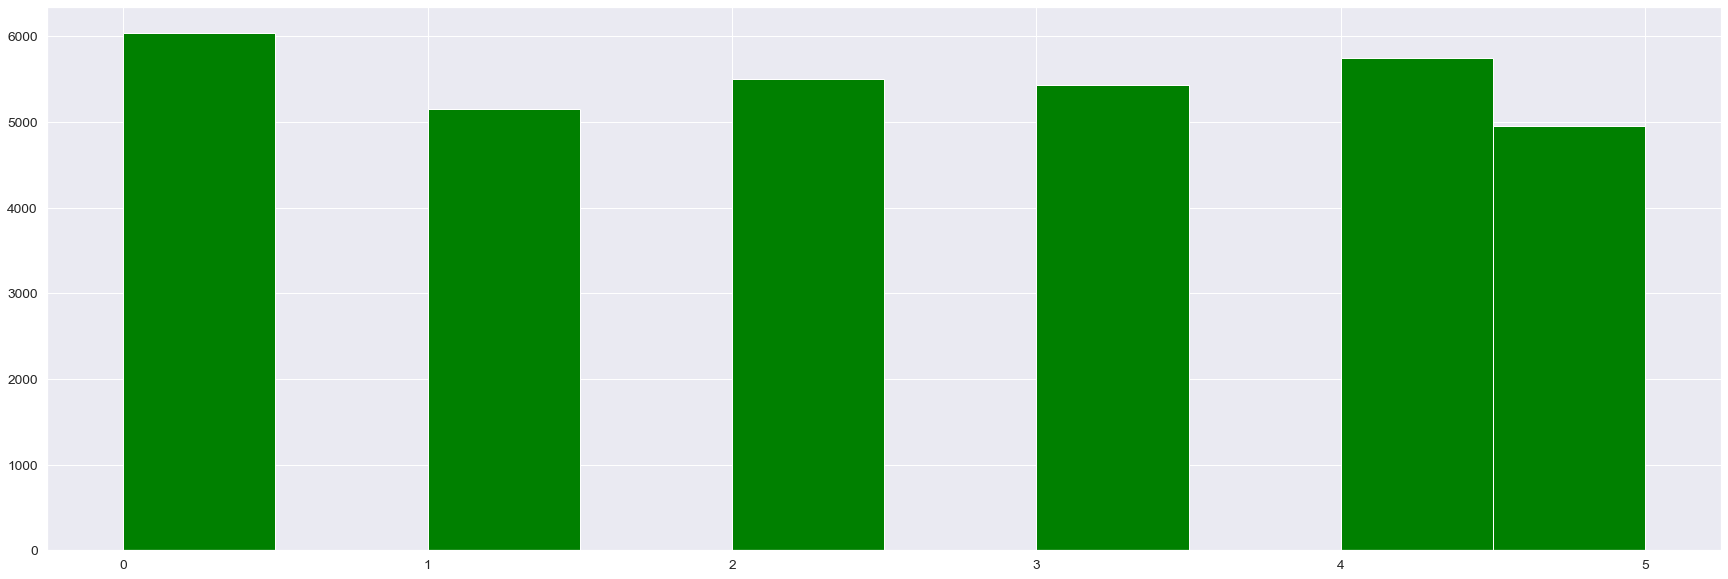

In [56]:
# Distribution of target

plt.figure(figsize = (30, 10))

target.hist(color = "green");


In [57]:
# Create train & test sets

X_train, X_test, y_train, y_test = train_test_split(features_val, target_val, test_size = 0.2, stratify = target_val, random_state = 8888)


In [58]:
print("- Shape of the training set X : ", X_train.shape)
print("- Shape of the testing set X : ", X_test.shape)
print("- Shape of the training set y : ", y_train.shape)
print("- Shape of the testing set y : ", y_test.shape)


- Shape of the training set X :  (26262, 12)
- Shape of the testing set X :  (6566, 12)
- Shape of the training set y :  (26262,)
- Shape of the testing set y :  (6566,)


In [59]:
print("Distribution of the target:", Counter(y_train))


Distribution of the target: Counter({0: 4834, 4: 4594, 2: 4406, 3: 4345, 1: 4122, 5: 3961})


We will use the standard scaler just for the Logistic Regression model ONLY. 

All the categories we have to classify have approximately equal orders of magnitude, to the nearest thousandth. However, to optimize our results with the logistic regression model, we decided to standardize the data to fit our training sample.

In [60]:
# Use of StandardScaler to scale the data & fit to X_train

# To standardize every feature in our dataset

scaler = StandardScaler()
scaler.fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
print("Shape of the training set X scaled : ", X_train_scaled.shape)


Shape of the training set X scaled :  (26262, 12)


### LOGISTIC REGRESSION MODEL

In [62]:
# Import the Logistic Regression model from sklearn and call it lr

lr = LogisticRegression()
lr


LogisticRegression()

In [63]:
# Fit the model on the training data

lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [64]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred_lr = lr.predict(X_test)


In [65]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred_lr = lr.predict(X_test_scaled)


In [66]:
# We compare the first predicted values with our actual value, to have an overview on how good (or bad) we predicted

print("- First five predicted genres : ", y_pred_lr[0:5])
print("- First five actual genres : ", list(y_test[0:5]))



- First five predicted genres :  [2 5 3 3 4]
- First five actual genres :  [3, 5, 1, 3, 2]


We will start by applying logistic regression. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. It’s important to test different ML models to compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified).


### RANDOM FOREST MODEL

In [67]:
# Build the model
rf =RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [68]:
# Make predictions and call this variable y_pred_dt
y_pred_rf = rf.predict(X_test)


In [69]:
# Print the first five predicted vs actual values
print("- First five predicted genres:", y_pred_rf[0:5])
print("- First five actual genres:", list(y_test[0:5]))


- First five predicted genres: [2 5 3 3 4]
- First five actual genres: [3, 5, 1, 3, 2]


Random Forest, also known as random decision forests, is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

### XGBOOST MODEL

In [70]:
# Build the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# Make predictions and call this variable y_pred_dt
y_pred_xgb = xgb.predict(X_test)


In [72]:
# Print the first five predicted vs actual values
print("- First five predicted genres:", y_pred_xgb[0:5])
print("- First five actual genres:", list(y_test[0:5]))


- First five predicted genres: [2 5 4 3 2]
- First five actual genres: [3, 5, 1, 3, 2]


XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solves many data science problems in a fast and accurate way.



## VI - PERFORMANCE EVALUATION

To assess the performance of our models, we need to use the appropriate metrics for each of Them, then gather these collected results in the same table to compare it and find the best model to complete prediction on our test set.


Here, we will base our evaluation on 4 metrics : Accuracy score, Recall score, Precision score & F1 score.

- Accuracy Score : The accuracy is an elementary score metric that calculates the average number of correctly predicted observations ;


- Recall Score : Recall, which is the proportion of correctly predicted positive observations among all those that should be predicted positively. Don't I tend to predict negative too often? (the total prediction of True Positive & False Negative).


- Precision Score : Precision, which is the proportion of observations correctly predicted among all those that are positively predicted (the total prediction of True Positive & False Positive).


- F1 Score : The F1-score is a more refined metric that takes into account the notion of false positives and false negatives. It is based on the calculation of two measures, which use the confusion matrix.


### LOGISTIC REGRESSION

- Logistic Regression was performed on X_train_scaled and not X_train; when we experimented with X_train, the results were limited to a single genre category: category 5, where the genre was "rock". With this scalarization of the data, we have better results for all genre predictions.

####  ON TESTING DATA SET

In [73]:
# EVALUATION OF THE LOGISTIC REGRESSION MODEL

print("- ACCURACY of Logistic Regression : ", round(accuracy_score(y_test, y_pred_lr), 2))
print("- RECALL of Logistic Regression : ", round(recall_score(y_test, y_pred_lr, average = 'macro'), 2))
print("- PRECISION of Logistic Regression : ", round(precision_score(y_test, y_pred_lr, average = 'macro'), 2))
print("- F1-SCORE of Logistic Regression : ", round(f1_score(y_test, y_pred_lr, average = 'macro'), 2))


- ACCURACY of Logistic Regression :  0.45
- RECALL of Logistic Regression :  0.45
- PRECISION of Logistic Regression :  0.44
- F1-SCORE of Logistic Regression :  0.44


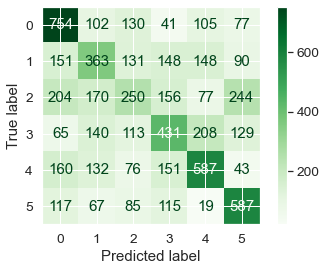

In [74]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(lr, X_test_scaled, y_test, cmap = plt.cm.Greens)


In [75]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.52      0.62      0.57      1209
           1       0.37      0.35      0.36      1031
           2       0.32      0.23      0.27      1101
           3       0.41      0.40      0.41      1086
           4       0.51      0.51      0.51      1149
           5       0.50      0.59      0.54       990

    accuracy                           0.45      6566
   macro avg       0.44      0.45      0.44      6566
weighted avg       0.44      0.45      0.44      6566



####  ON TRAINING DATA SET

In [76]:
# COMPARE WITH THE PERFORMANCES OF THE MODEL ON THE TRAINING DATA SET

y_pred_train_lr = lr.predict(X_train_scaled)

print("- ACCURACY of Logistic Regression : ", round(accuracy_score(y_train, y_pred_train_lr), 2))
print("- RECALL of Logistic Regression : ", round(recall_score(y_train, y_pred_train_lr, average = 'macro'), 2))
print("- PRECISION of Logistic Regression : ", round(precision_score(y_train, y_pred_train_lr, average = 'macro'), 2))
print("- F1-SCORE of Logistic Regression : ", round(f1_score(y_train, y_pred_train_lr, average = 'macro'), 2))


- ACCURACY of Logistic Regression :  0.46
- RECALL of Logistic Regression :  0.46
- PRECISION of Logistic Regression :  0.45
- F1-SCORE of Logistic Regression :  0.45


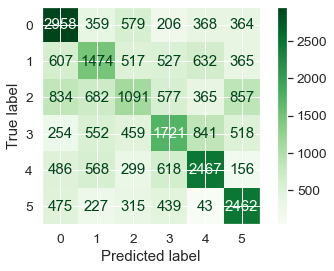

In [77]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(lr, X_train_scaled, y_train, cmap = plt.cm.Greens)


In [78]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_train, y_pred_train_lr))


              precision    recall  f1-score   support

           0       0.53      0.61      0.57      4834
           1       0.38      0.36      0.37      4122
           2       0.33      0.25      0.28      4406
           3       0.42      0.40      0.41      4345
           4       0.52      0.54      0.53      4594
           5       0.52      0.62      0.57      3961

    accuracy                           0.46     26262
   macro avg       0.45      0.46      0.45     26262
weighted avg       0.45      0.46      0.46     26262



#### PLOT THE LEARNING CURVES

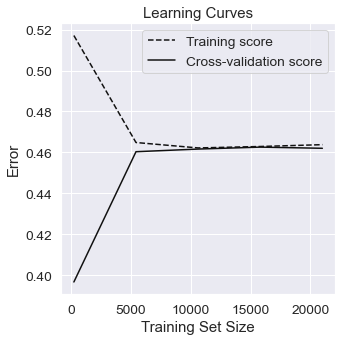

In [79]:
# PLOT THE LEARNING CURVE FOR OUR RANDOM FOREST MODEL 

learning_curve_plot(lr, X_train_scaled, y_train, scoring = 'accuracy')


#### ANALYSIS

- Even though we have applied the Logistic Regression model on our Testing data sets and Training data sets, the metrics give us poor results;
- There is a low variance and a high bias on accuracy ; we can talk about underfitting, at least it seems to be ;
- High accuracy on training set, signs of variance between test and training set;
- Gap between the learning curve also shows signs of overfitting;
- Accuracy is not precise at all for logistic regression;

### RANDOM FOREST

####  ON TESTING DATA SET

In [80]:
# EVALUATION OF THE RANDOM FOREST MODEL

print("- ACCURACY of Random Forest : ", round(accuracy_score(y_test, y_pred_rf), 2))
print("- RECALL of Random Forest : ", round(recall_score(y_test, y_pred_rf, average = 'macro'), 2))
print("- PRECISION of Random Forest : ", round(precision_score(y_test, y_pred_rf, average = 'macro'), 2))
print("- F1-SCORE of Random Forest : ", round(f1_score(y_test, y_pred_rf, average = 'macro'), 2))


- ACCURACY of Random Forest :  0.56
- RECALL of Random Forest :  0.55
- PRECISION of Random Forest :  0.55
- F1-SCORE of Random Forest :  0.55


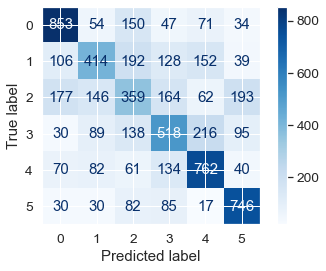

In [81]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues)


In [82]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1209
           1       0.51      0.40      0.45      1031
           2       0.37      0.33      0.34      1101
           3       0.48      0.48      0.48      1086
           4       0.60      0.66      0.63      1149
           5       0.65      0.75      0.70       990

    accuracy                           0.56      6566
   macro avg       0.55      0.55      0.55      6566
weighted avg       0.55      0.56      0.55      6566



####  ON TRAINING DATA SET

In [83]:
# COMPARE WITH THE PERFORMANCES OF THE MODEL ON THE TRAINING DATA SET

y_pred_train_rf = rf.predict(X_train)

print("- ACCURACY of Random Forest : ", round(accuracy_score(y_train, y_pred_train_rf), 2))
print("- RECALL of Random Forest : ", round(recall_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("- PRECISION of Random Forest : ", round(precision_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("- F1-SCORE of Random Forest : ", round(f1_score(y_train, y_pred_train_rf, average = 'macro'), 2))



- ACCURACY of Random Forest :  0.94
- RECALL of Random Forest :  0.94
- PRECISION of Random Forest :  0.94
- F1-SCORE of Random Forest :  0.94


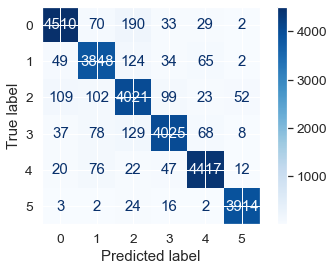

In [84]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(rf, X_train, y_train, cmap = plt.cm.Blues)


In [85]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_train, y_pred_train_rf))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4834
           1       0.92      0.93      0.93      4122
           2       0.89      0.91      0.90      4406
           3       0.95      0.93      0.94      4345
           4       0.96      0.96      0.96      4594
           5       0.98      0.99      0.98      3961

    accuracy                           0.94     26262
   macro avg       0.94      0.94      0.94     26262
weighted avg       0.94      0.94      0.94     26262



#### PLOT THE FEATURE IMPORTANCES

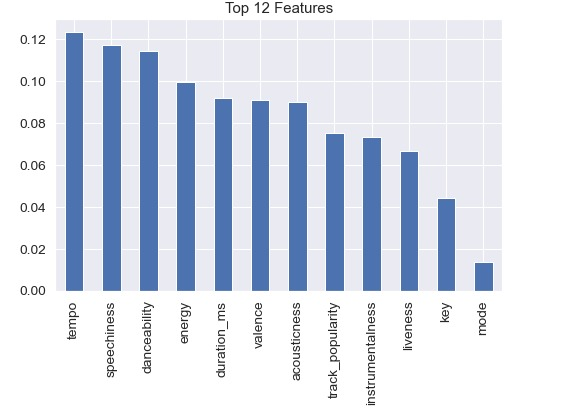

#### PLOT THE LEARNING CURVES

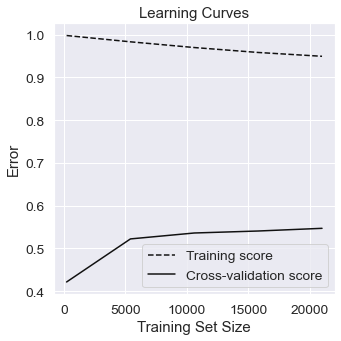

In [86]:
# PLOT THE LEARNING CURVE FOR OUR RANDOM FOREST MODEL

learning_curve_plot(rf, X_train, y_train, scoring = 'accuracy')


#### ANALYSIS

- We see an improvement in accuracy compared to Logistic Regression, with this model of Random Forest ;

- There is a high variance and low bias on accuracy ; We can clearly talk about overfitting ;

- There are still signs of overfitting as accuracy scores are much better on the training set than on the test set ;

- Feature importance plot shows that tempo is the most important feature; however with random forest model the features have lower scores than with XGBoost ;

- The gap between the learning curve also shows signs of overfitting and high variance;

### XGBOOST

####  ON TESTING DATA SET

In [87]:
# EVALUATION OF THE XGBOOST MODEL

print("- ACCURACY of XGBoost : ", round(accuracy_score(y_test, y_pred_xgb), 2))
print("- RECALL of XGBoost : ", round(recall_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("- PRECISION of XGBoost : ", round(precision_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("- F1-SCORE of XGBoost : ", round(f1_score(y_test, y_pred_xgb, average = 'macro'), 2))


- ACCURACY of XGBoost :  0.56
- RECALL of XGBoost :  0.56
- PRECISION of XGBoost :  0.55
- F1-SCORE of XGBoost :  0.55


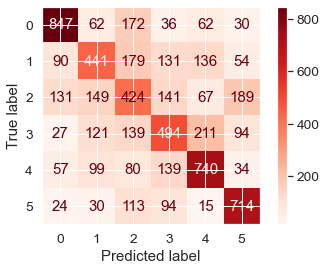

In [88]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(xgb, X_test, y_test, cmap = plt.cm.Reds)


In [89]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1209
           1       0.49      0.43      0.46      1031
           2       0.38      0.39      0.38      1101
           3       0.48      0.45      0.47      1086
           4       0.60      0.64      0.62      1149
           5       0.64      0.72      0.68       990

    accuracy                           0.56      6566
   macro avg       0.55      0.56      0.55      6566
weighted avg       0.55      0.56      0.55      6566



#### ON TRAINING DATA SET

In [90]:
# COMPARE WITH THE PERFORMANCES OF THE MODEL ON THE TRAINING DATA SET

y_pred_train_xgb = xgb.predict(X_train)

print("- ACCURACY of XGBoost : ", round(accuracy_score(y_train, y_pred_train_xgb), 2))
print("- RECALL of XGBoost : ", round(recall_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("- PRECISION of XGBoost : ", round(precision_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("- F1-SCORE of XGBoost : ", round(f1_score(y_train, y_pred_train_xgb, average = 'macro'), 2))


- ACCURACY of XGBoost :  0.79
- RECALL of XGBoost :  0.79
- PRECISION of XGBoost :  0.79
- F1-SCORE of XGBoost :  0.79


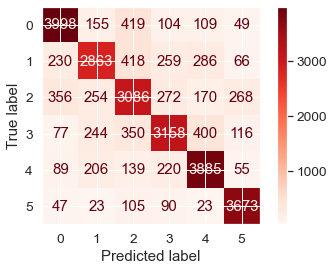

In [91]:
# PLOT OF THE CONFUSION MATRIX

plot_confusion_matrix(xgb, X_train, y_train, cmap = plt.cm.Reds)


In [92]:
# PRINT A CLEAN CLASSIFICATION REPORT

print(classification_report(y_train, y_pred_train_xgb))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4834
           1       0.76      0.69      0.73      4122
           2       0.68      0.70      0.69      4406
           3       0.77      0.73      0.75      4345
           4       0.80      0.85      0.82      4594
           5       0.87      0.93      0.90      3961

    accuracy                           0.79     26262
   macro avg       0.79      0.79      0.79     26262
weighted avg       0.79      0.79      0.79     26262



#### PLOT THE FEATURE IMPORTANCES

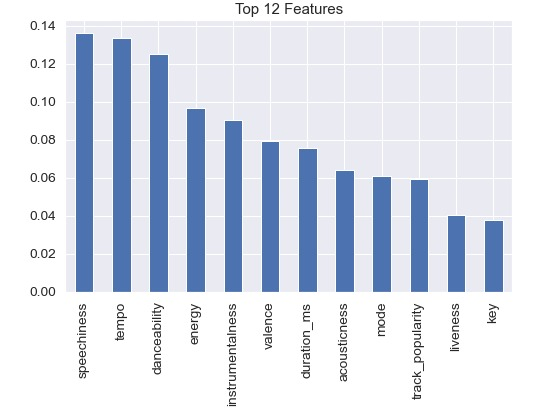

#### PLOT THE LEARNING CURVES

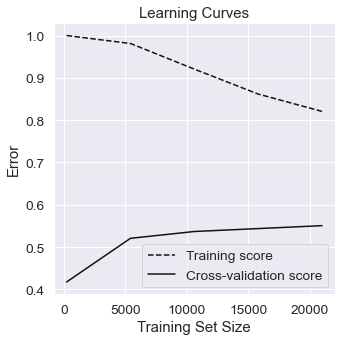

In [93]:
# PLOT THE LEARNING CURVE FOR OUR RANDOM FOREST MODEL 

learning_curve_plot(xgb, X_train, y_train, scoring = 'accuracy')


#### ANALYSIS

- We see improvements in accuracy and precision;
- There is a high variance and low bias on accuracy ; We can clearly talk about overfitting ;
- The feature importance plot shows that speechiness is the best feature when it comes to explaining genre ;
- We can also see that with the random forest model the features have higher scores than previous models;
- Although there are still signs of overfitting, it is much less than with the Random Forest and Logistic Regression models. Furthermore this could be reduced with more tuning and more data;

The genre with the highest precision of prediction is the class 0, which stands for "EDM".

So far, this one seems to be our best model to use, in terms of results with our performance metrics.

For further analysis and improvement, we will use this on to work on and exploit to predict with a better accuracy the genres.

#### IMPROVEMENT with GridSearchCV

We wanted to optimize our XGBoost model with the use of a GridSearchCV. 

As a reminder, the GridSearchCV will go through all the parameters, and thus select the best possible combinations of parameters (from the hyperparameter tuning).

In [94]:
# use GridSearch to identify the best parameters
# we are using different values:
# 1. n_estimators (number of trees) 
# 2. max_features (This is in the form of a percentage. For e.g. we use 20% of features)

grid_search = GridSearchCV(XGBClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(100,500,100),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
# the best parameters

grid_search.best_params_


In [ ]:
# build a Random Forest Model with these parameters

best_model_grid = RandomForestClassifier(**grid_search.best_params_)
best_model_grid.fit(X_train, y_train)
y_pred_grid = best_model.predict(X_test)


In [ ]:


print("- ACCURACY for GridSearchCV : ", round(accuracy_score(y_test, y_pred_grid), 2))
print("- RECALL for GridSearchCV : ", round(recall_score(y_test, y_pred_grid, average = 'macro'), 2))
print("- PRECISION for GridSearchCV : ", round(precision_score(y_test, y_pred_grid, average = 'macro'), 2))
print("- F1-SCORE for GridSearchCV : ", round(f1_score(y_test, y_pred_grid, average = 'macro'), 2))


Unfortunately, the results are not conclusive. With more time, we would have reworked our features, especially their composition (try several combinations), in order to optimize our classification results. 

## VII - IMPROVEMENTS (DATASET TUNING) & CONCLUSIONS

While the current results aren't satisfactory, a little bit of data tuning could have helped our models do a better performance. Notably, the presence of duplicates in the data, and misclassification of genre for some of these duplicate rows, appears to be limitations for our models.

In [95]:
# setting up our data from a backup done after cleaning
df_songs = df_backup
df_songs.shape

(32828, 19)

### 1) DUPLICATES IN THE DATA - Observations

#### TRACK_ID DUPLICATES

The dataset notably has over 4400 rows of tracks that share the same track_id, and are essentially the same with the same numerical features.

In [96]:
# retrieving all the rows with the same track_id
df_dups = df_songs[df_songs['track_id'].duplicated()].sort_values(by = 'track_id', ascending = True).sort_values(by = 'track_id')
df_dups.head(3)

track_id                     track_name track_artist  \
32084  00Gu3RMpDW2vO9PjlMVFDL  Hide Away (feat. Envy Monroe)  Blasterjaxx   
23850  00QyLmjxaSEE8qIZQjBXBj     We Own It (Fast & Furious)     2 Chainz   
28968  00QyLmjxaSEE8qIZQjBXBj     We Own It (Fast & Furious)     2 Chainz   

       track_popularity                       playlist_name  \
32084                42  Epic Bass Drops | Best House Mixes   
23850                59                Today's Hits (Clean)   
28968                59                         Locker Room   

                  playlist_id  genre  danceability  energy  key  loudness  \
32084  4IS7o1utOzhimFEFnj9gmu      0         0.573   0.746   10    -4.894   
23850  7ENISpOJhocpMJVcGb0qcT      3         0.554   0.899    8    -4.573   
28968  37i9dQZF1DX8SaiEt4OVJw      0         0.554   0.899    8    -4.573   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
32084     1       0.0421        0.0249               0.0    0.3610    0.134   
23850     1       0.4080        0.0521               0.0    0.0568    0.552   
28968     1       0.4080        0.0521               0.0    0.0568    0.552   

         tempo  duration_ms  
32084  130.001       188000  
23850  171.966       227893  
28968  171.966       227893

In [97]:
df_dups.shape

(4476, 19)

##### Observation 1: track_id duplicates

Below, we see the same song by Drake 4 times, with all the metrics and track_id being the same but with the genre being inconsistent.

In [98]:
# retrieving all the duplicates of a specific song
df_songs[df_songs['track_id'] == '12VWzyPDBCc8fqeWCAfNwR'][['track_id', 'track_name', 'track_artist', 'genre']]

track_id track_name track_artist  genre
3018   12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      2
4640   12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      2
20463  12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      1
30072  12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      0

#### TRACK_NAME & TRACK_ARTIST DUPLICATES

On top of that, the dataset also has over 6500 rows of tracks that share the same name and artist, but appear under different track_id and have different numerical features (based on their respective track_id). An example would be those two instances of Till I Collapse by Eminem (end of the last frame) which are clearly the same song, but have different track_id and metrics.

In [99]:
# retrieving all the rows with the same name and artist
df_dups2 = df_songs[df_songs.duplicated(subset=['track_name', 'track_artist'])].sort_values(by = 'track_name', ascending = True)
df_dups2.head(5)

track_id  \
7075   5xGxl3Iux0worDz9tLbaDn   
23318  6AoYWCzsDls6c61Zp5qTuU   
14503  65NTcXUtOb27NHKQ4fAcw0   
28964  4xkOaSrkexMciUUogZKVTS   
15525  6yr8GiTHWvFfi4o6Q5ebdT   

                                              track_name track_artist  \
7075                                           #1 Stunna   Big Tymers   
23318  $ave Dat Money (feat. Fetty Wap & Rich Homie Q...    Lil Dicky   
14503                                     '39 - 2011 Mix        Queen   
28964                                   'Till I Collapse       Eminem   
15525                                   'Till I Collapse       Eminem   

       track_popularity                                  playlist_name  \
7075                  0        Dirty South Rap Classics by DJ HOTSAUCE   
23318                69                                        Hip pop   
14503                60  I didn’t know perm stood for permanent (wave)   
28964                83                                    Locker Room   
15525                16                             Hard Rock Workout!   

                  playlist_id  genre  danceability  energy  key  loudness  \
7075   0tLHH1C4HkWEUCXXSSjbOe      4         0.552   0.839    2    -4.984   
23318  1Sc7bobknESH7SXQcnmoX5      3         0.858   0.697    2    -5.361   
14503  3e6gYPyrTbaB8BWgSHCt5j      5         0.524   0.571    8    -9.686   
28964  37i9dQZF1DX8SaiEt4OVJw      0         0.548   0.847    1    -3.237   
15525  5nQrMpkyWmxPX0gk74htMk      5         0.551   0.851    1    -3.277   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
7075      1       0.2840        0.0150           0.00404    0.2580    0.569   
23318     1       0.2300        0.1140           0.00000    0.2240    0.364   
14503     1       0.0273        0.0271           0.00000    0.1110    0.373   
28964     1       0.1860        0.0622           0.00000    0.0816    0.100   
15525     1       0.1970        0.0748           0.00000    0.0784    0.100   

         tempo  duration_ms  
7075    89.070       281960  
23318   98.012       290836  
14503  101.626       210800  
28964  171.447       297787  
15525  171.411       297893

In [100]:
df_dups2.shape

(6599, 19)

##### Observation 2: tracks with same name and artist

We notably see that the song "Hotline Bling" by Drake appears 5 time, under 4 different track_ids and sets of metrics.

In [101]:
# retrieving all the songs called "Hotline Bling" by the artist "Drake"
df_hotline = df_songs[(df_songs['track_name'] == "Hotline Bling") & (df_songs['track_artist'] == "Drake")]
df_hotline[['track_id', 'track_name', 'track_artist', 'genre']]

track_id     track_name track_artist  genre
2147   76P07ei8drjrenqtvDbefy  Hotline Bling        Drake      2
2739   1UfBAJfmofTffrae5ls6DA  Hotline Bling        Drake      2
3831   6nmz4imkDcmtwMjocAzFSx  Hotline Bling        Drake      2
21022  1UfBAJfmofTffrae5ls6DA  Hotline Bling        Drake      1
30694  0wwPcA6wtMf6HUMpIRdeP7  Hotline Bling        Drake      0

In [102]:
print('Number of different track_id in above dataframe: ', df_hotline['track_id'].nunique())

Number of different track_id in above dataframe:  4


To better tune our dataset, we'd need to address these issues of duplicates and misclassification in our data by correcting the genre of the affected rows. These rows amount to a maximum of 6599, so around 20% of our data.

### 2) OUR ISSUE SUMMARIZED (example of Drake)

Our issue is simple, in the dataframe below, we see multiple instances of the same songs by Drake, under different genres, but even under different track_id and metrics.

In [103]:
# retrieving drake songs
df_songs[df_songs['track_artist'] == 'Drake'][['track_id', 'track_name', 'track_artist', 'genre']]

track_id       track_name track_artist  genre
2147   76P07ei8drjrenqtvDbefy    Hotline Bling        Drake      2
2483   1xznGGDReH1oQq0xzbwXa3        One Dance        Drake      2
2530   11KJSRSgaDxqydKYiD2Jew         Too Good        Drake      2
2662   1GxHeBvQ9935Dd3cSfsfBa  Best I Ever Had        Drake      2
2704   0JoaFxLgrqbWutREzcZBzS        One Dance        Drake      2
...                       ...              ...          ...    ...
28970  0Bpkq4z0VfjkO7kUME8gks          Forever        Drake      0
30072  12VWzyPDBCc8fqeWCAfNwR        One Dance        Drake      0
30424  6DCZcSspjsKoFjzjrWoCdn       God's Plan        Drake      0
30466  1zi7xx7UVEFkmKfv06H8x0        One Dance        Drake      0
30694  0wwPcA6wtMf6HUMpIRdeP7    Hotline Bling        Drake      0

[100 rows x 4 columns]

The song "One Dance" notably appears in the data 12 time, and under all these genres:

In [104]:
df_songs[(df_songs['track_name'] == "One Dance") & (df_songs['track_artist'] == "Drake")]['genre'].value_counts()

2    5
0    2
1    2
3    2
4    1
Name: genre, dtype: int64

### 3) FIXING THE MISLABELING AND DUPLICATES

#### THE FIX: ASSIGNING THE CORRECT GENRE TO DUPLICATES AND DROPPING

Currently, our best fix would be to assign the right genre to every row that is duplicated, based on the top genre that the current row's track_id most appears as. This is achieved by doing a for each loop that will go through every row of our dataset and locate track_id duplicates. The code would then assign to the duplicate rows the genre that is most popular in the dataset for the current row's track name and artist.

In [105]:
df_fixed = df_songs # to keep a trace of the data before the fix

# loop that assigns the correct genre to every problematic row
for index, row in df_fixed.iterrows():
    # a few basic variables that the loop uses
    currentline = row['genre']
    var = df_fixed[(df_fixed['track_name'] == row.loc['track_name']) & (df_fixed['track_artist'] == row.loc['track_artist'])]['genre'].value_counts()
    
    #if the current track_id is shared with other rows, then run
    if df_fixed[df_fixed['track_id'] == row.loc['track_id']].shape[0] > 1:
        if var.size == 0:
            currentline = row['genre']
        else:
            # this looks for every row that has the same name and artist as the current row (same song), and gets their top genre 
            currentline = df_fixed[(df_fixed['track_name'] == row.loc['track_name']) & (df_fixed['track_artist'] == row.loc['track_artist'])]['genre'].value_counts().idxmax(0)
    else: 
        # if there's no duplicates, it just keeps the current genre
        currentline = row['genre']
    df_fixed.at[index, 'track_genre'] = currentline

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/MaxiPunKey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
# fixing the column order so our new column is after genre
new_cols = ["track_id","track_name","track_artist","track_popularity", "playlist_name", "playlist_id", "genre", "track_genre", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]
df_fixed = df_fixed[new_cols]

#### CHECKING IF GENRES ARE FIXED

We can now check if our code worked by looking for that Drake song from before, where all the metrics and track_id was the same, but there was different genres. They're now assigned a consistant one.

In [107]:
df_fixed[df_fixed['track_id'] == '12VWzyPDBCc8fqeWCAfNwR'][['track_id', 'track_name', 'track_artist', 'genre', 'track_genre']]

track_id track_name track_artist  genre  track_genre
3018   12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      2          2.0
4640   12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      2          2.0
20463  12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      1          2.0
30072  12VWzyPDBCc8fqeWCAfNwR  One Dance        Drake      0          2.0

And on top of this, the code still keeps the original nuances from the data. Each track_id has a unique set of features, and hence it's justified that in some cases there could be an instance of the same song (same name and artist) having another genre, that's more similar to how the data originally is for those features. Below is another Drake example where the last row differs, as its respective track_id was in majority edm or not duplicated.

In [108]:
df_fixed[(df_fixed['track_name'] == "Hotline Bling") & (df_fixed['track_artist'] == "Drake")][['track_id', 'track_name', 'track_artist', 'genre', 'track_genre', 'loudness', 'energy']]

track_id     track_name track_artist  genre  track_genre  \
2147   76P07ei8drjrenqtvDbefy  Hotline Bling        Drake      2          2.0   
2739   1UfBAJfmofTffrae5ls6DA  Hotline Bling        Drake      2          2.0   
3831   6nmz4imkDcmtwMjocAzFSx  Hotline Bling        Drake      2          2.0   
21022  1UfBAJfmofTffrae5ls6DA  Hotline Bling        Drake      1          2.0   
30694  0wwPcA6wtMf6HUMpIRdeP7  Hotline Bling        Drake      0          0.0   

       loudness  energy  
2147     -8.039   0.617  
2739     -7.857   0.639  
3831     -8.008   0.623  
21022    -7.857   0.639  
30694    -7.861   0.625

#### DROPPING DUPLICATES AFTER THE FIX

Usually, we would now drop our duplicates that have the same track_id, but upon inspection and trial-and-error, we figured out we should keep those rows for better performance. 

In [109]:
# dropping duplicates in a final dataset
df_final = df_fixed
# df_final.drop_duplicates(subset = ['track_id'], keep = 'first', inplace = True)

##### The data we kept / saved in our tuning

In [110]:

duplcount = df_final[df_final.duplicated(subset=['track_name', 'track_artist'])].sort_values(by = 'track_name', ascending = True).shape[0]
print('Number of rows with same track_name and artist left: ', duplcount)


Number of rows with same track_name and artist left:  6599


After this step, and thanks to some of the specifics of our code, we saved over 2100 rows from being flagged as duplicates and deleted. These rows have their specific features and target genre that will be beneficial to our models' prediction abilities.

#### FINAL DISTRIBUTION OF TRACK_GENRE IN THE DATA

Our df_final now shows this slightly different distribution of genre:

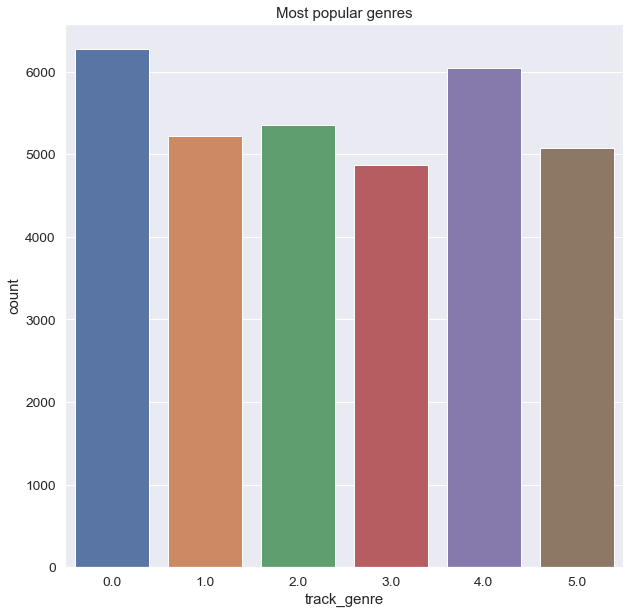

In [111]:
figure = plt.figure(figsize=(10,10))

sns.countplot(x='track_genre',data=df_final).set_title('Most popular genres');

In [112]:
df_final.shape

(32828, 19)

### 4) FEATURE ENGINEERING

After this data cleanup, we make the data go through the same feature engineering as last time, where we set the proper feature and target, as well as encode our genre.

In [113]:

features = df_final.drop(['genre', 'track_genre', 'track_id', 'track_artist', 'track_name', 'playlist_id', 'playlist_name', 'loudness'], axis = 1)
target = df_final['track_genre']


In [114]:
features_val = features.values
target_val = target.values

In [115]:
label_encoder = preprocessing.LabelEncoder() 
df_final['genre'] = label_encoder.fit_transform(df_final['track_genre'])
df_final['genre'].unique()

<ipython-input-115-4041258da388>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 2, 1, 4, 5, 3])

In [116]:
target = df_final['genre']
target_val = target.values

### 5) MODEL TRAINING & EVALUATION

Finally, we'll make the tuned dataset go through the same model training as above, and we'll evaluate how they perform.

In [117]:
print("- Shape of the target value : ", target.shape)
print("- Shape of the feature values : ", features.shape)

- Shape of the target value :  (32828,)
- Shape of the feature values :  (32828, 11)


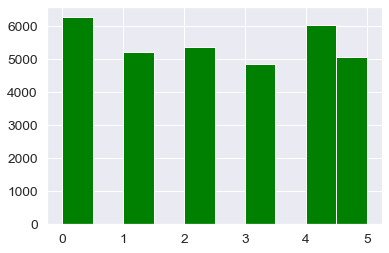

In [118]:
target.hist(color = "green");

In [119]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 0)

In [120]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### LOGISIC REGRESSION

In [121]:
lr = LogisticRegression()
lr

LogisticRegression()

In [122]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [123]:
y_pred_lr = lr.predict(X_test_scaled)

In [124]:
print("- First five predicted total amounts : ", y_pred_lr[0:5])
print("- First five actual total amounts : ", list(y_test[0:5]))

- First five predicted total amounts :  [4 1 3 3 0]
- First five actual total amounts :  [3, 4, 0, 3, 1]


In [125]:
# EVALUATION OF THE LOGISTIC REGRESSION MODEL

print("- ACCURACY of Logistic Regression : ", round(accuracy_score(y_test, y_pred_lr), 2))
print("- RECALL of Logistic Regression : ", round(recall_score(y_test, y_pred_lr, average = 'macro'), 2))
print("- PRECISION of Logistic Regression : ", round(precision_score(y_test, y_pred_lr, average = 'macro'), 2))
print("- F1-SCORE of Logistic Regression : ", round(f1_score(y_test, y_pred_lr, average = 'macro'), 2))

- ACCURACY of Logistic Regression :  0.48
- RECALL of Logistic Regression :  0.47
- PRECISION of Logistic Regression :  0.46
- F1-SCORE of Logistic Regression :  0.46


Like before, Logistic Regression is very underwhelming.

#### RANDOM FOREST

In [126]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred_rf = rf.predict(X_test)

In [128]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [4 2 0 3 2]
first five actual values: [3, 4, 0, 3, 1]


In [129]:
# EVALUATION OF THE RANDOM FOREST MODEL

print("- ACCURACY of Random Forest : ", round(accuracy_score(y_test, y_pred_rf), 2))
print("- RECALL of Random Forest : ", round(recall_score(y_test, y_pred_rf, average = 'macro'), 2))
print("- PRECISION of Random Forest : ", round(precision_score(y_test, y_pred_rf, average = 'macro'), 2))
print("- F1-SCORE of Random Forest : ", round(f1_score(y_test, y_pred_rf, average = 'macro'), 2))

- ACCURACY of Random Forest :  0.67
- RECALL of Random Forest :  0.66
- PRECISION of Random Forest :  0.66
- F1-SCORE of Random Forest :  0.65


In [130]:
# COMPARE WITH THE PERFORMANCES OF THE MODEL ON THE TRAINING DATA SET

y_pred_train_rf = rf.predict(X_train)

print("- ACCURACY of Random Forest : ", round(accuracy_score(y_train, y_pred_train_rf), 2))
print("- RECALL of Random Forest : ", round(recall_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("- PRECISION of Random Forest : ", round(precision_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("- F1-SCORE of Random Forest : ", round(f1_score(y_train, y_pred_train_rf, average = 'macro'), 2))

- ACCURACY of Random Forest :  1.0
- RECALL of Random Forest :  1.0
- PRECISION of Random Forest :  1.0
- F1-SCORE of Random Forest :  1.0


Like before, Random Forest sounds good but ends up overfitting.

#### XGBOOST REGRESSOR

In [131]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
y_pred_xgb = xgb.predict(X_test)

In [133]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [3 1 3 3 4]
first five actual values: [3, 4, 0, 3, 1]


In [134]:
# EVALUATION OF THE XGBOOST MODEL

print("- ACCURACY of XGBoost : ", round(accuracy_score(y_test, y_pred_xgb), 2))
print("- RECALL of XGBoost : ", round(recall_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("- PRECISION of XGBoost : ", round(precision_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("- F1-SCORE of XGBoost : ", round(f1_score(y_test, y_pred_xgb, average = 'macro'), 2))

- ACCURACY of XGBoost :  0.63
- RECALL of XGBoost :  0.63
- PRECISION of XGBoost :  0.62
- F1-SCORE of XGBoost :  0.62


In [135]:
# COMPARE WITH THE PERFORMANCES OF THE MODEL ON THE TRAINING DATA SET

y_pred_train_xgb = xgb.predict(X_train)

print("- ACCURACY of XGBoost : ", round(accuracy_score(y_train, y_pred_train_xgb), 2))
print("- RECALL of XGBoost : ", round(recall_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("- PRECISION of XGBoost : ", round(precision_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("- F1-SCORE of XGBoost : ", round(f1_score(y_train, y_pred_train_xgb, average = 'macro'), 2))

- ACCURACY of XGBoost :  0.84
- RECALL of XGBoost :  0.84
- PRECISION of XGBoost :  0.84
- F1-SCORE of XGBoost :  0.84


Bingo, in the case of the XGBoost Classifier, the model seems to perform better after this data tuning.

Overall, the data tuning seems to have been beneficial for our model's prediction abilities. It would be interesting to, in the future, dig further in the data and see what operations would improve the performance. Here, all the choices of the tuning were made by using trial-and-error based on model performance, but also by using insight and knowledge about music data. Further experimentation could be done by using other categorical features of the data like track_artist or playlist_name, and maybe even basing the fixed genre on some of these discarded features. 